# EMAIL SPAM DETECTION

### IMPORTING IMPORTANT LIBRARIES

In [6]:
import numpy as np

In [7]:
import pandas as pd

In [8]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

### LOAD DATA

In [10]:
data=pd.read_csv(r"C:\SUDIPTA\BWU\Desktop\CodersCave\email spam detection\dataset\archive\spam.csv", encoding='ISO-8859-1')

### EXPLORE AND CLEAN DATA

In [11]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [13]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [14]:
data.shape

(5572, 5)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [17]:
data.shape

(5572, 2)

In [18]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
df=data.rename(columns={'v1':'Target','v2':'Message'})

In [20]:
df.shape

(5572, 2)

In [21]:
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [22]:
df.duplicated().sum()

403

In [23]:
df.drop_duplicates(keep='first',inplace=True)

In [24]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5169, dtype: bool

In [25]:
df.duplicated().sum()

0

In [26]:
df.shape

(5169, 2)

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
df['Target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

### VISUALIZE DATA

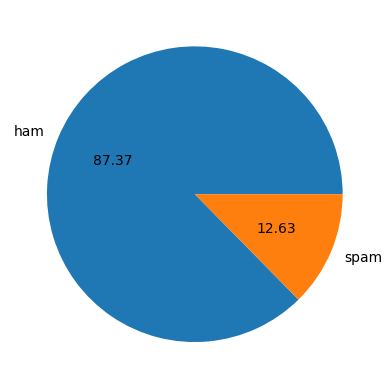

In [28]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [29]:
x=df['Message']
y=df['Target']

In [30]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [31]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

### SPLIT AND TRAIN

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [34]:
cv=CountVectorizer()

In [35]:
x_train_cv=cv.fit_transform(x_train)
x_test_cv=cv.transform(x_test)

In [36]:
print(x_train_cv)

  (0, 5825)	1
  (0, 6678)	1
  (1, 1694)	1
  (1, 5513)	1
  (1, 6528)	1
  (1, 2429)	1
  (1, 4343)	1
  (1, 4097)	1
  (1, 1524)	1
  (1, 7501)	1
  (1, 392)	1
  (1, 7337)	1
  (1, 4652)	1
  (1, 1372)	1
  (2, 6217)	1
  (2, 7234)	1
  (2, 3584)	1
  (2, 6689)	1
  (2, 1224)	1
  (2, 6488)	1
  (3, 6689)	1
  (3, 7543)	1
  (3, 2940)	1
  (3, 5689)	1
  (3, 3691)	1
  :	:
  (4132, 2680)	1
  (4132, 2557)	1
  (4133, 6805)	1
  (4133, 1611)	1
  (4133, 4717)	1
  (4133, 4284)	1
  (4133, 5907)	1
  (4133, 4062)	1
  (4133, 1058)	2
  (4133, 6956)	1
  (4133, 1780)	1
  (4133, 250)	1
  (4133, 2632)	1
  (4133, 2411)	1
  (4133, 6075)	1
  (4133, 5691)	1
  (4133, 7551)	1
  (4133, 629)	1
  (4133, 5652)	1
  (4133, 1525)	1
  (4134, 1555)	1
  (4134, 1559)	1
  (4134, 7242)	1
  (4134, 4840)	1
  (4134, 4148)	1


In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [38]:
lr.fit(x_train_cv,y_train)
prediction_train=lr.predict(x_train_cv)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
print(accuracy_score(y_train,prediction_train)*100)

99.75816203143893


In [41]:
prediction_test=lr.predict(x_test_cv)

In [42]:
print(accuracy_score(y_test,prediction_test)*100)

97.678916827853
